<a href="https://colab.research.google.com/github/adithya72/Deep-Learning/blob/Develop/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Neural Networks on MNIST dataset.

Load all the dependent libraries

In [1]:
import tensorflow
import keras
#read the MNIST dataset
from keras.datasets import mnist

Now explore the data set, mnist is a popular dataset that consists of handwritten images which are gray scale, a series of 70 thousand numbers 28*28 pixels. 60000 as training set and 10000 as test set.

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data() # returns tuple of numpy arrays (x_train, y_train),(x_test, y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#exploring the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let's explore the first one

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

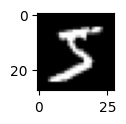

In [4]:
print(x_train[0]) #returns first element which is 28*28 matrix
print("First data point is labled as :",y_train[0]) #returns what the first element is labled as
#let's print the image of first row which 28*28 for this we need matlab library
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
#print the first image
plt.imshow(x_train[0],cmap="gray")
plt.show()

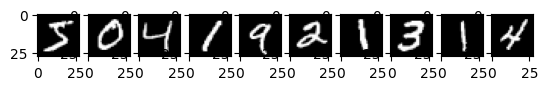

lable for each of the above image :  [5 0 4 1 9 2 1 3 1 4]


In [5]:
#now visualize first 10 figures
for i in range(10):
  plt.subplot(1,10,i+1) #subplot row, col and index number to render
  plt.imshow(x_train[i], cmap="gray")

plt.show()
print("lable for each of the above image : ", y_train[0:10])

Normalize our train and test data
i.e. 28*28 gray scale images contains numbers from 0 to 255 - 0 being black and 255 being white. In Neural network -> activation functions: They perform well when the numbers are close to zero hence we are going to reshape them in to vectors and divide all the numbers by 255 to normalize the data.

In [6]:
#flatten the image - it converts 28 * 28 in to one single vector/simple matrix

print(x_train[0])
print(x_test[0])
print("after reshaping")
image_vector_size = 28*28 #784 inputs
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

print(x_train[0])
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#normalize the data by dividing it with 255, so all the numbers will be close to zero

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0])
print(x_test[0])

print('Training Set Shape', x_train.shape, y_train.shape)
print('Test Set Shape', x_test.shape, y_test.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

test label's contains numbers from 0-9, but neural network is not going to output the categorial variables like 0,1,2,3,4,5,6,7,8,9 instead it returns a output in the form of vector with a probability. So first all the test label's should be converted in to vectors and model will return either zero's or ones, so for example if it returns 4 zeros then it is 4, if returns 5 zero it would be 5. we use technique called one hot encoding OHT to convert test labels in to vectors.

In [8]:
print(y_train[0])
print("After Transformation")
num_classes = 10
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes)
y_test_cat = to_categorical(y_test,num_classes)

print(y_train[0])
print("first 5 training labels as one-hot encoded vectors:\n", y_train[:5])

5
After Transformation
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
first 5 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Let's create the model

In [9]:
# define model
image_size = 28*28 #no of inputs for each image which will be passed to model is 28*28 = 784
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#model is sequential
model = Sequential()

#add one layer -
#Dense = every node connected to every node,
#num_classes = no of nodes,
#activation is softmax function which returns probability, it can be sigmoid, Relu ..etc.
#input shape = no of inputs
#softmax takes all output and divides by sum of outputs to check the probability of y^ to y.
model.add(Dense(num_classes, activation="softmax", kernel_initializer="he_uniform",input_shape=(image_size,)))


#Model optimizer functions - RMSprop, Adagrad - adam and SGD - Stochastic Gradient Descent
# Gradient Descent - Passes all the inputs to the model and computes the loss/error. Based on the it adjusts the weights.
# Stochastic Gradient Descent - SGD uses only training sample to compute the loss/error and adjust the weights, hence the convergence is
# more, given it runs faster compare to gradient descent which runs entire data set
# Adagrad - Adaptive Gradient - it's similar to SGD but it automatically adjusts the weights based on the loss/error.
# RMSProp - It's similar to adaptive but ensures the learning rate is not too high, it decays the gradient descent
# Adam - RMSProp + SGD with momentum
#An optimization algorithm finds the value of the parameters (weights) that minimize the error when mapping inputs to outputs.

In [10]:

from tensorflow.keras import losses

adam = optimizers.Adam(learning_rate=1e-3) #lr = learning rate 1e-3 = 10 to the power -3 = 1/10 ^ 3 = 0.001
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#loss function used is catogorical cross entropy since it's classification problem
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#add callbacks - these are functions called bny optimizers to check the status of the model. Read more ...
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode="max", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,min_lr=0.00001, model='auto')
callbacks = [checkpoint, reduce_lr]

In [12]:
# ready to train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
375/375 - 1s - loss: 0.7587 - accuracy: 0.8126 - val_loss: 0.4090 - val_accuracy: 0.8957 - lr: 0.0010 - 1s/epoch - 3ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
375/375 - 1s - loss: 0.3902 - accuracy: 0.8962 - val_loss: 0.3344 - val_accuracy: 0.9100 - lr: 0.0010 - 516ms/epoch - 1ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
375/375 - 1s - loss: 0.3386 - accuracy: 0.9073 - val_loss: 0.3069 - val_accuracy: 0.9159 - lr: 0.0010 - 577ms/epoch - 2ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
375/375 - 1s - loss: 0.3147 - accuracy: 0.9127 - val_loss: 0.2939 - val_accuracy: 0.9181 - lr: 0.0010 - 564ms/epoch - 2ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
375/375 - 1s - loss: 0.3004 - accuracy: 0.9160 - val_loss: 0.2853 - val_accuracy: 0.9222 - lr: 0.0010 - 577ms/epoch - 2ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
375/375 - 1s - loss: 0.2905 - accuracy: 0.91

In [13]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 825us/step


Predicted model on the test data.
And the out of y_pred would be probabilities of each output class.

In [14]:
y_pred[0]

array([9.4170728e-06, 6.5170458e-10, 3.3243294e-05, 5.5382829e-03,
       1.0555169e-06, 2.4772547e-05, 6.5137185e-09, 9.9373156e-01,
       3.6511556e-05, 6.2511163e-04], dtype=float32)

In [15]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [ ]:
y_pred_final[0]
print(y_test)
print(y_pred_final)


[7 2 1 ... 4 5 6]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 

Generating Classification Report

In [ ]:
#Generating classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Confusion Matrix

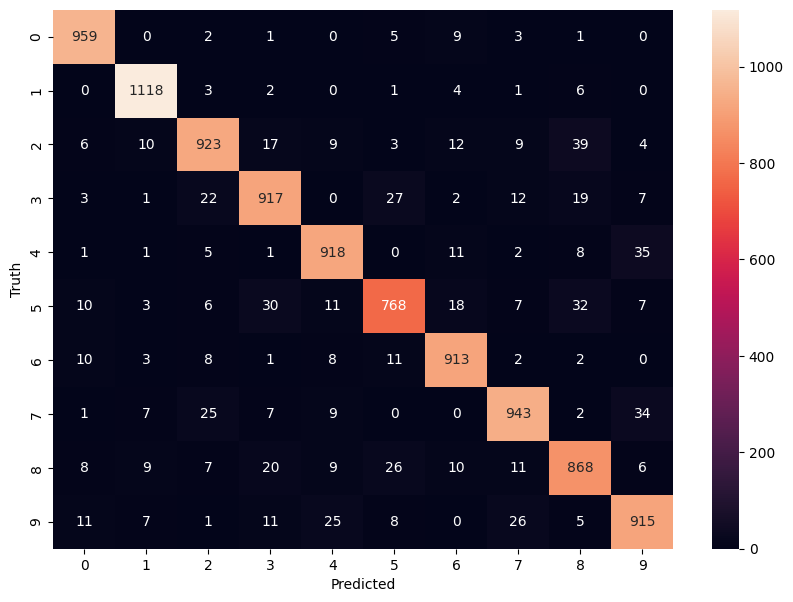

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Misclassified Images

In [ ]:
index=0
misclassified_images=[]
for label, predict in zip(y_test,y_pred_final):
  if label != predict:
    misclassified_images.append(index)
  index += 1
print(misclassified_images)
print(len(misclassified_images))


[8, 33, 66, 124, 149, 193, 195, 211, 233, 241, 247, 259, 290, 300, 307, 318, 320, 321, 340, 352, 359, 362, 381, 412, 435, 444, 445, 448, 468, 478, 479, 502, 507, 511, 531, 536, 542, 543, 551, 565, 569, 578, 582, 583, 591, 613, 619, 627, 628, 629, 659, 684, 691, 692, 707, 717, 720, 728, 738, 740, 741, 760, 791, 839, 844, 857, 877, 881, 890, 898, 924, 938, 939, 947, 950, 951, 956, 959, 965, 975, 982, 999, 1012, 1014, 1017, 1028, 1032, 1033, 1039, 1044, 1050, 1062, 1068, 1082, 1096, 1101, 1107, 1112, 1114, 1119, 1128, 1157, 1173, 1181, 1182, 1191, 1192, 1194, 1198, 1202, 1204, 1206, 1217, 1226, 1228, 1232, 1234, 1242, 1247, 1248, 1256, 1260, 1283, 1289, 1299, 1310, 1315, 1319, 1325, 1326, 1328, 1337, 1347, 1364, 1378, 1393, 1409, 1410, 1413, 1429, 1433, 1444, 1465, 1466, 1467, 1469, 1494, 1500, 1514, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1587, 1609, 1634, 1640, 1641, 1681, 1686, 1695, 1696, 1709, 1717, 1718, 1722, 1732, 1737, 1751, 1754, 1765, 1772, 1774, 1790, 1800, 1813,